# Example of SGD usage with [Iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork

Iris dataset has 4 inputs and 3 classes corresponding 3 Iris species.

In [2]:
X = np.genfromtxt('iris.data', delimiter = ',', usecols = [0,1,2,3])
Y_labels = np.genfromtxt('iris.data', delimiter = ',', usecols = [4], dtype = str) 

X_size, number_of_inputs = X.shape
number_of_outputs = len(set(Y_labels))
n = X.shape[0]
labels = dict(zip(set(Y_labels), np.arange(len(set(Y_labels)))))

Y = np.zeros((X_size, number_of_outputs))
for i in range(X_size):
    Y[i, labels[Y_labels[i]]] = 1

In [3]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
Y[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

First 10 examples. 1 in 3rd position in y corresponds to 3rd class, same with 1st and 2nd.

In [5]:
net = NeuralNetwork.Network((number_of_inputs, 5, number_of_outputs))

Initialize neural network with 4 neurons in input layer, 5 in hidden layer and 3 in output layer. Also, there one hidden neuron in input and hidden layers. All weights are initialized randomly.

In [6]:
X_size = X.shape[0]
train_size = 50
train_ind = np.random.choice(X_size, train_size, replace = False)
test_ind = np.setdiff1d(np.arange(X_size), train_ind)
X_train, Y_train = X[train_ind], Y[train_ind]
X_test, Y_test = X[test_ind], Y[test_ind]

Randomly select 50 examples for training dataset and 100 for testing.

In [7]:
parameters = {'LearningRate' : 0.1, 'BatchSize' : 5, 'Tolerance' : 1e-5, 'MaxIter' : 2000, 'PrintStep' : 100}

Set stochastic gradient descent parameters.

In [8]:
J = net.SGD(X_train, Y_train, **parameters)

iteration 0 	 J = 1.929592464898198
iteration 100 	 J = 0.4885369309695742
iteration 200 	 J = 0.26436013078548004
iteration 300 	 J = 0.24723754169265622
iteration 400 	 J = 0.21386085559597795
iteration 500 	 J = 0.16440209579886492
iteration 600 	 J = 0.12127148801841951
iteration 700 	 J = 0.0658906227279241
iteration 800 	 J = 0.02324336364114694
iteration 900 	 J = 0.01929860045623031
--- SGD finished ---


Perform gradient descent to fit parameters. eps = 1e-5 means that algorithm stops when absolute difference in cost function values between two iterations is less than 0.00001.

In [9]:
accuracy_train = 0
for k in range(len(Y_train)):
    accuracy_train += np.argmax(net.predict(X_train[k])) == np.argmax(Y_train[k])
print(f"\naccuracy on train = {accuracy_train/len(Y_train)} ({accuracy_train}/{len(Y_train)})")

accuracy_test = 0
for k in range(len(Y_test)):
    #print(n.h(X_test[k]), np.argmax(n.h(X_test[k])) == np.argmax(Y_test[k]))
    accuracy_test += np.argmax(net.predict(X_test[k])) == np.argmax(Y_test[k])
print(f"accuracy on test = {accuracy_test/len(Y_test)} ({accuracy_test}/{len(Y_test)})")


accuracy on train = 1.0 (50/50)
accuracy on test = 0.93 (93/100)


Check accuracy on training and testing datasets.

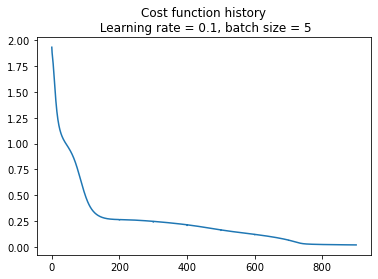

In [10]:
plt.plot(J)
plt.title(f"Cost function history\n Learning rate = {parameters['LearningRate']}, batch size = {parameters['BatchSize']}")
plt.show()

Plot cost values as function of number of iteration.

In [11]:
demo_index = np.random.choice(X_size, 10, replace = False)
np.set_printoptions(suppress=True)
print("neural network output \t\t\t correct output \t equals?")
for i in demo_index:
    print(f"{net.predict(X[i])} \t {Y[i]} \t\t {np.argmax(net.predict(X[i])) == np.argmax(Y[i])}")


neural network output 			 correct output 	 equals?
[0.00182338 0.00308669 0.99597137] 	 [0. 0. 1.] 		 True
[0.99568892 0.00039106 0.00642293] 	 [1. 0. 0.] 		 True
[0.93812416 0.00061668 0.06991567] 	 [1. 0. 0.] 		 True
[0.99803574 0.00033943 0.00313523] 	 [1. 0. 0.] 		 True
[0.99800507 0.00034037 0.00318091] 	 [1. 0. 0.] 		 True
[0.00260744 0.00276918 0.99470048] 	 [0. 0. 1.] 		 True
[0.00001761 0.99641633 0.0057899 ] 	 [0. 1. 0.] 		 True
[0.99791526 0.0003435  0.00331162] 	 [1. 0. 0.] 		 True
[0.00001708 0.99669949 0.00534842] 	 [0. 1. 0.] 		 True
[0.00984975 0.00214174 0.98256149] 	 [1. 0. 0.] 		 False


Compare some neural network outputs with correct ones.